In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
from tqdm import trange
import torch
from torch import nn, optim
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/keyan/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
# prepare the data
df_age = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row1 = pd.Series([205, 160, 162, 222, 'Without HateGuard'], index=df_age.columns)
row1_1 = pd.Series([58, 47, 52, 76, 'With HateGuard'], index=df_age.columns)

df_asian = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row2 = pd.Series([299, 479, 520, 404, 'Without HateGuard'], index=df_asian.columns)
row2_1 = pd.Series([76, 192, 130, 111, 'With HateGuard'], index=df_asian.columns)

df_mask = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row3 = pd.Series([12, 77, 269, 240, 'Without HateGuard'], index=df_mask.columns)
row3_1 = pd.Series([2, 21, 38, 27, 'With HateGuard'], index=df_mask.columns)

df_vac = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row4 = pd.Series([83, 112, 124, 253, 'Without HateGuard'], index=df_vac.columns)
row4_1 = pd.Series([11, 21, 19, 38, 'With HateGuard'], index=df_vac.columns)

df_us = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row5 = pd.Series([537, 141, 224, 185, 'Without HateGuard'], index=df_us.columns)
row5_1 = pd.Series([129, 38, 52, 35, 'With HateGuard'], index=df_us.columns)

df_ru = pd.DataFrame(columns=['quarter1', 'quarter2', 'quarter3', 'quarter4', 'type'])
row6 = pd.Series([245, 217, 302, 89, 'Without HateGuard'], index=df_ru.columns)
row6_1 = pd.Series([94, 93, 95, 31, 'With HateGuard'], index=df_ru.columns)


In [21]:
df_age = df_age.append(row1, ignore_index=True)
df_age = df_age.append(row1_1, ignore_index=True)

df_asian = df_asian.append(row2, ignore_index=True)
df_asian = df_asian.append(row2_1, ignore_index=True)

df_mask = df_mask.append(row3, ignore_index=True)
df_mask = df_mask.append(row3_1, ignore_index=True)

df_vac = df_vac.append(row4, ignore_index=True)
df_vac = df_vac.append(row4_1, ignore_index=True)

df_us = df_us.append(row5, ignore_index=True)
df_us = df_us.append(row5_1, ignore_index=True)

df_ru = df_ru.append(row6, ignore_index=True)
df_ru = df_ru.append(row6_1, ignore_index=True)

In [23]:
df_asian.iloc[0, :4].tolist()

[299, 479, 520, 404]

In [46]:
def plot(df, title, ytick_loc):
    # plot the data
    fig = plt.figure(figsize=(3, 2))
    x = df.columns[:4]
    # read the first row
    # df.iloc[0, :4].tolist()
    y1 = df.iloc[0, :4].tolist()
    y2 = df.iloc[1, :4].tolist()
    ax = sns.lineplot(x=x, y=y1, label='Without HateGuard', color='tomato', linestyle='-', marker='s', linewidth=1.5)
    ax = sns.lineplot(x=x, y=y2, label='With HateGuard', color='darkgreen', linestyle='-', marker='s', linewidth=1.5)
    ax.set_ylabel('Number of New Hateful Tweets')
    # change the xticks
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['1st quarter \nof 2020', '2nd quarter \nof 2020', '3rd quarter \nof 2020', '4th quarter \nof 2020'])
    # change the yticks
    ax.set_yticks(ytick_loc)
    # add grid
    ax.grid(True)
    # the legend box
    ax.legend(frameon=True)

    # save the figure as pdf
    fig.savefig('new_wave_plots/'+ title + '.pdf', bbox_inches='tight')
    plt.show()
    

In [47]:
import latex
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])

plt.rcParams.update({
    "font.family": "serif",
    # Use LaTeX default serif font.
    "font.serif": ["Times New Roman"],
    # Use specific cursive fonts.
    "font.cursive": ["Comic Neue", "Times New Roman"],
})

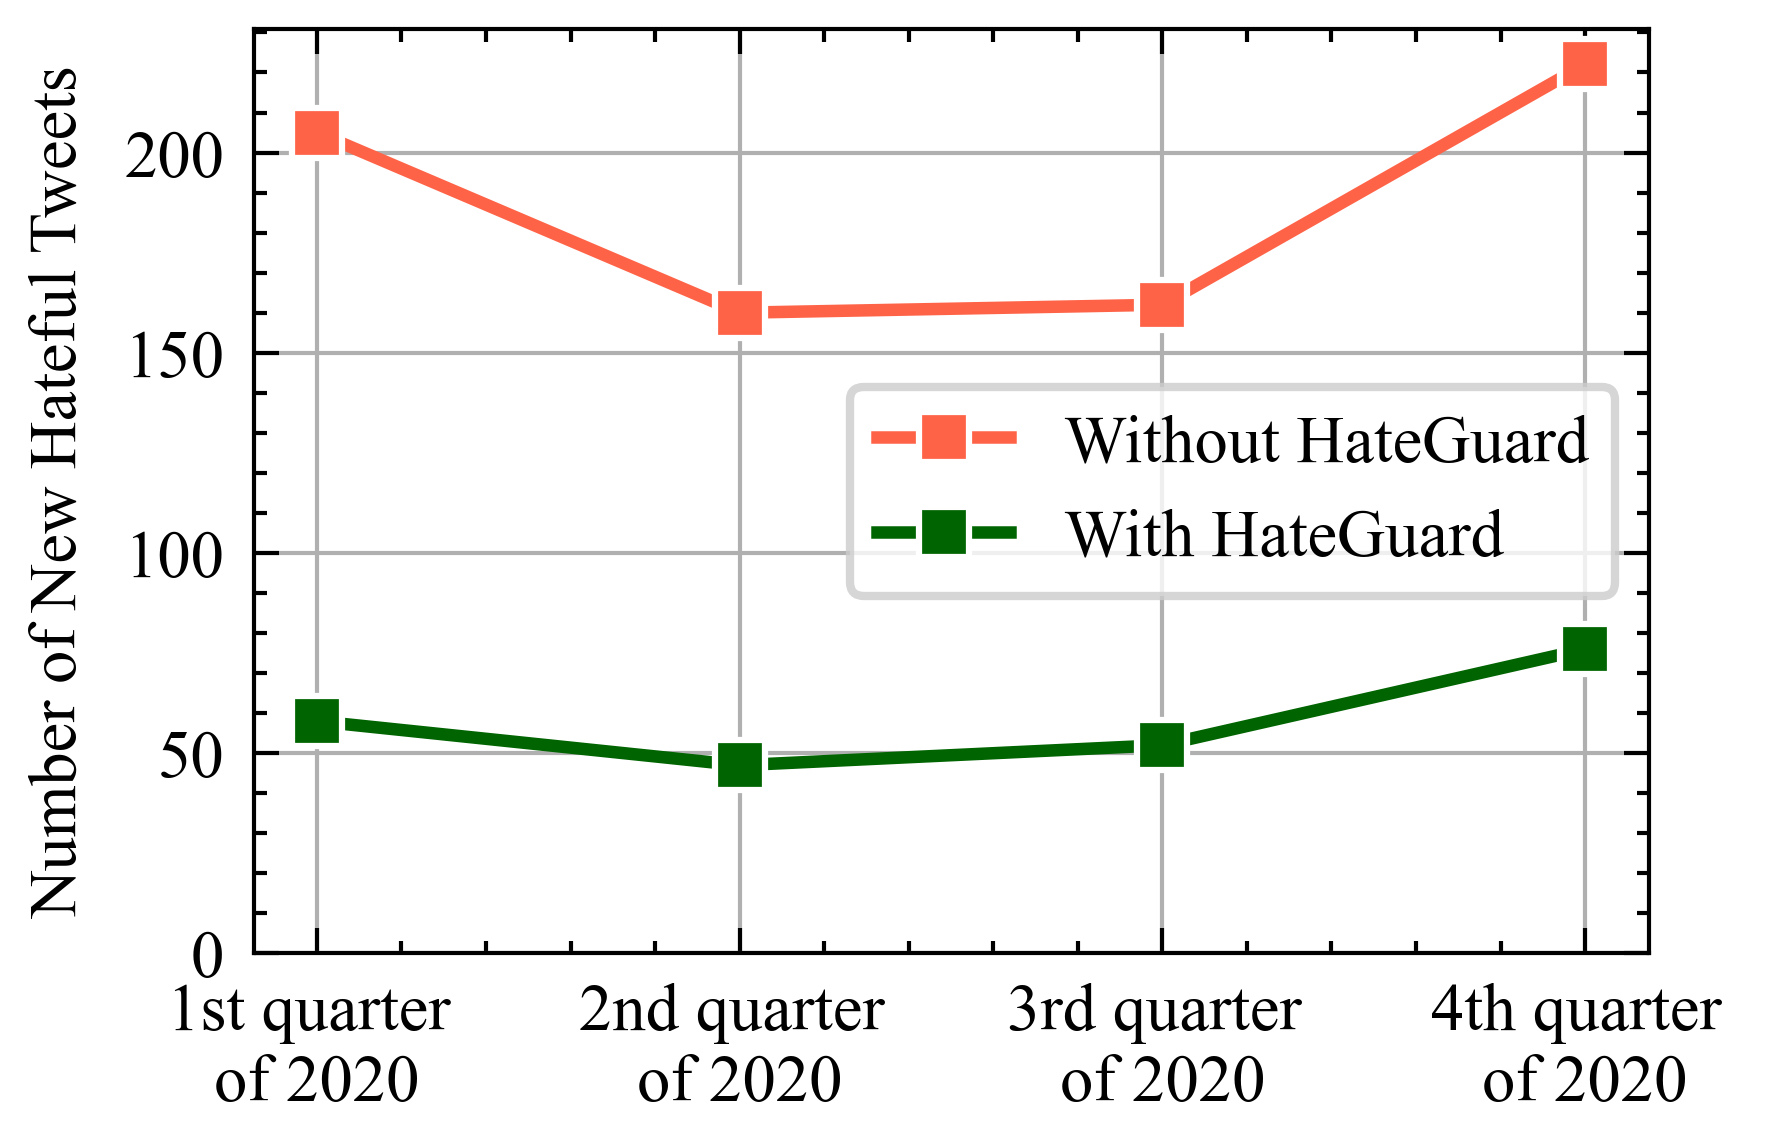

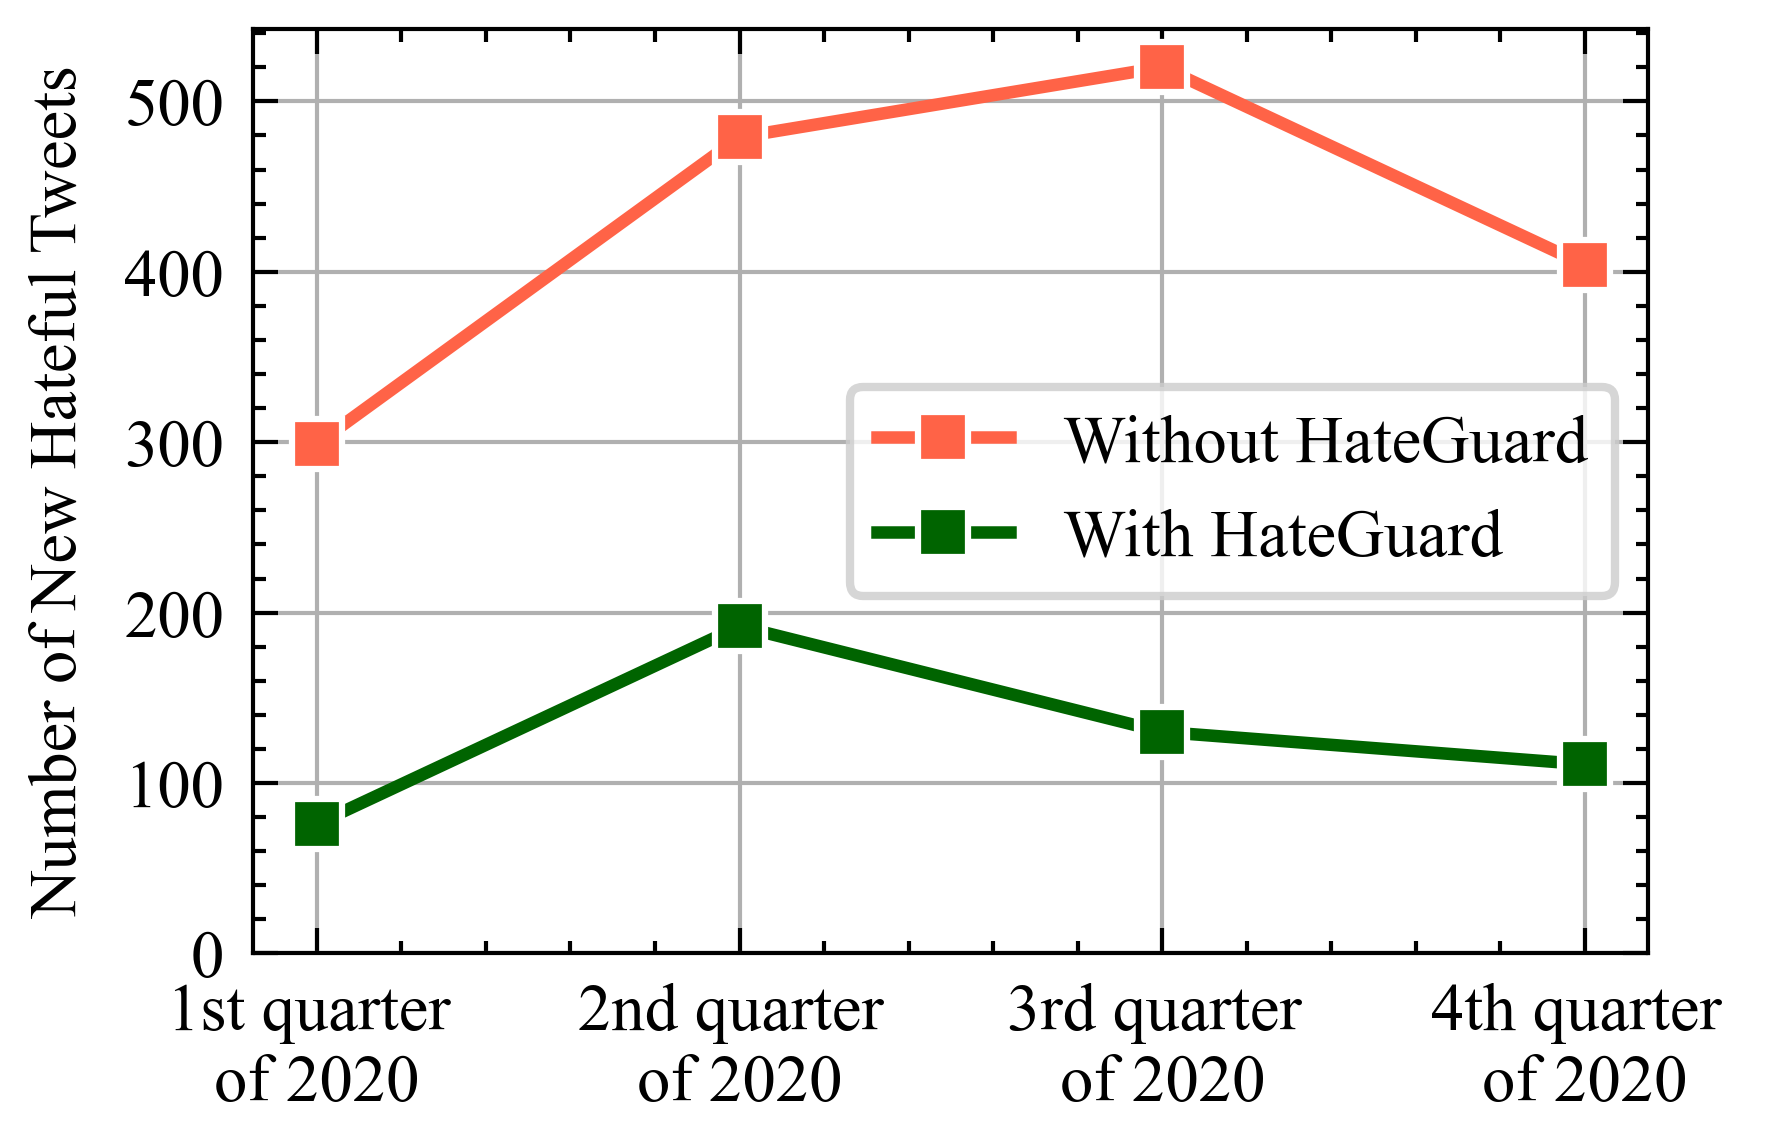

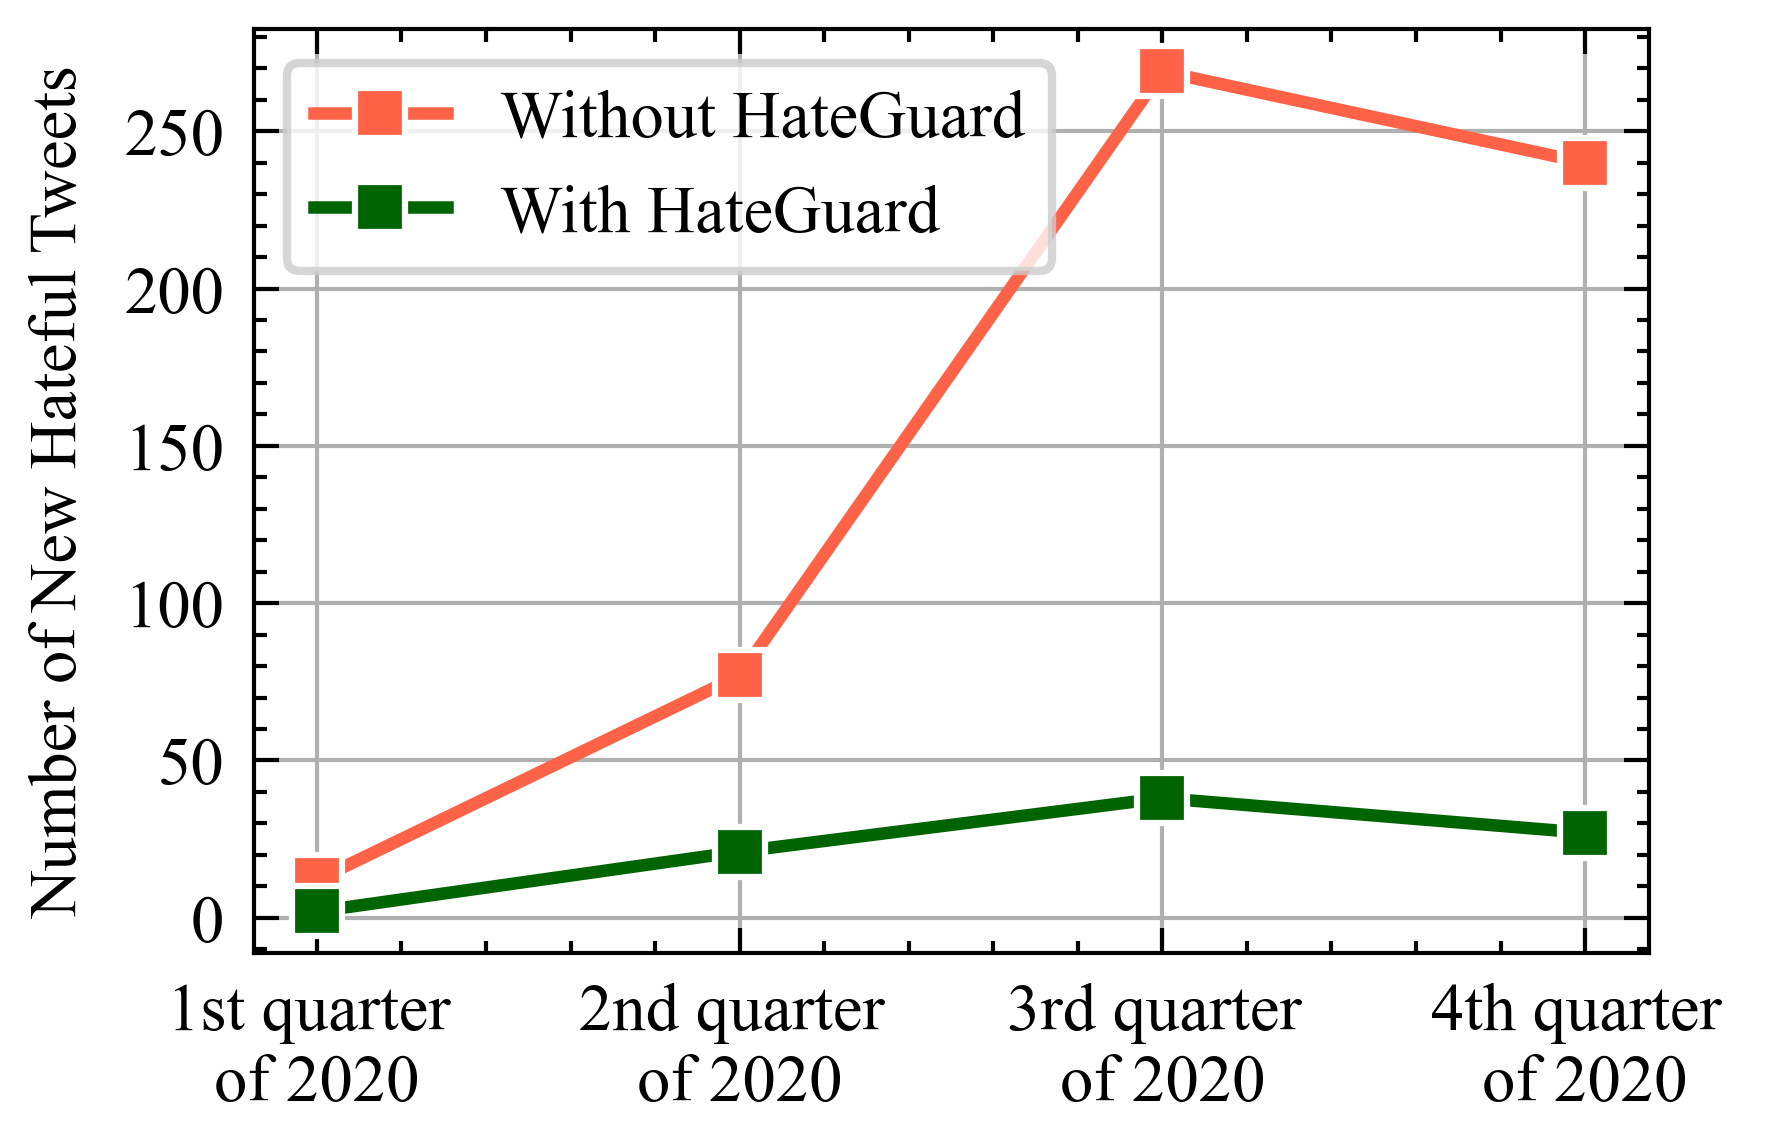

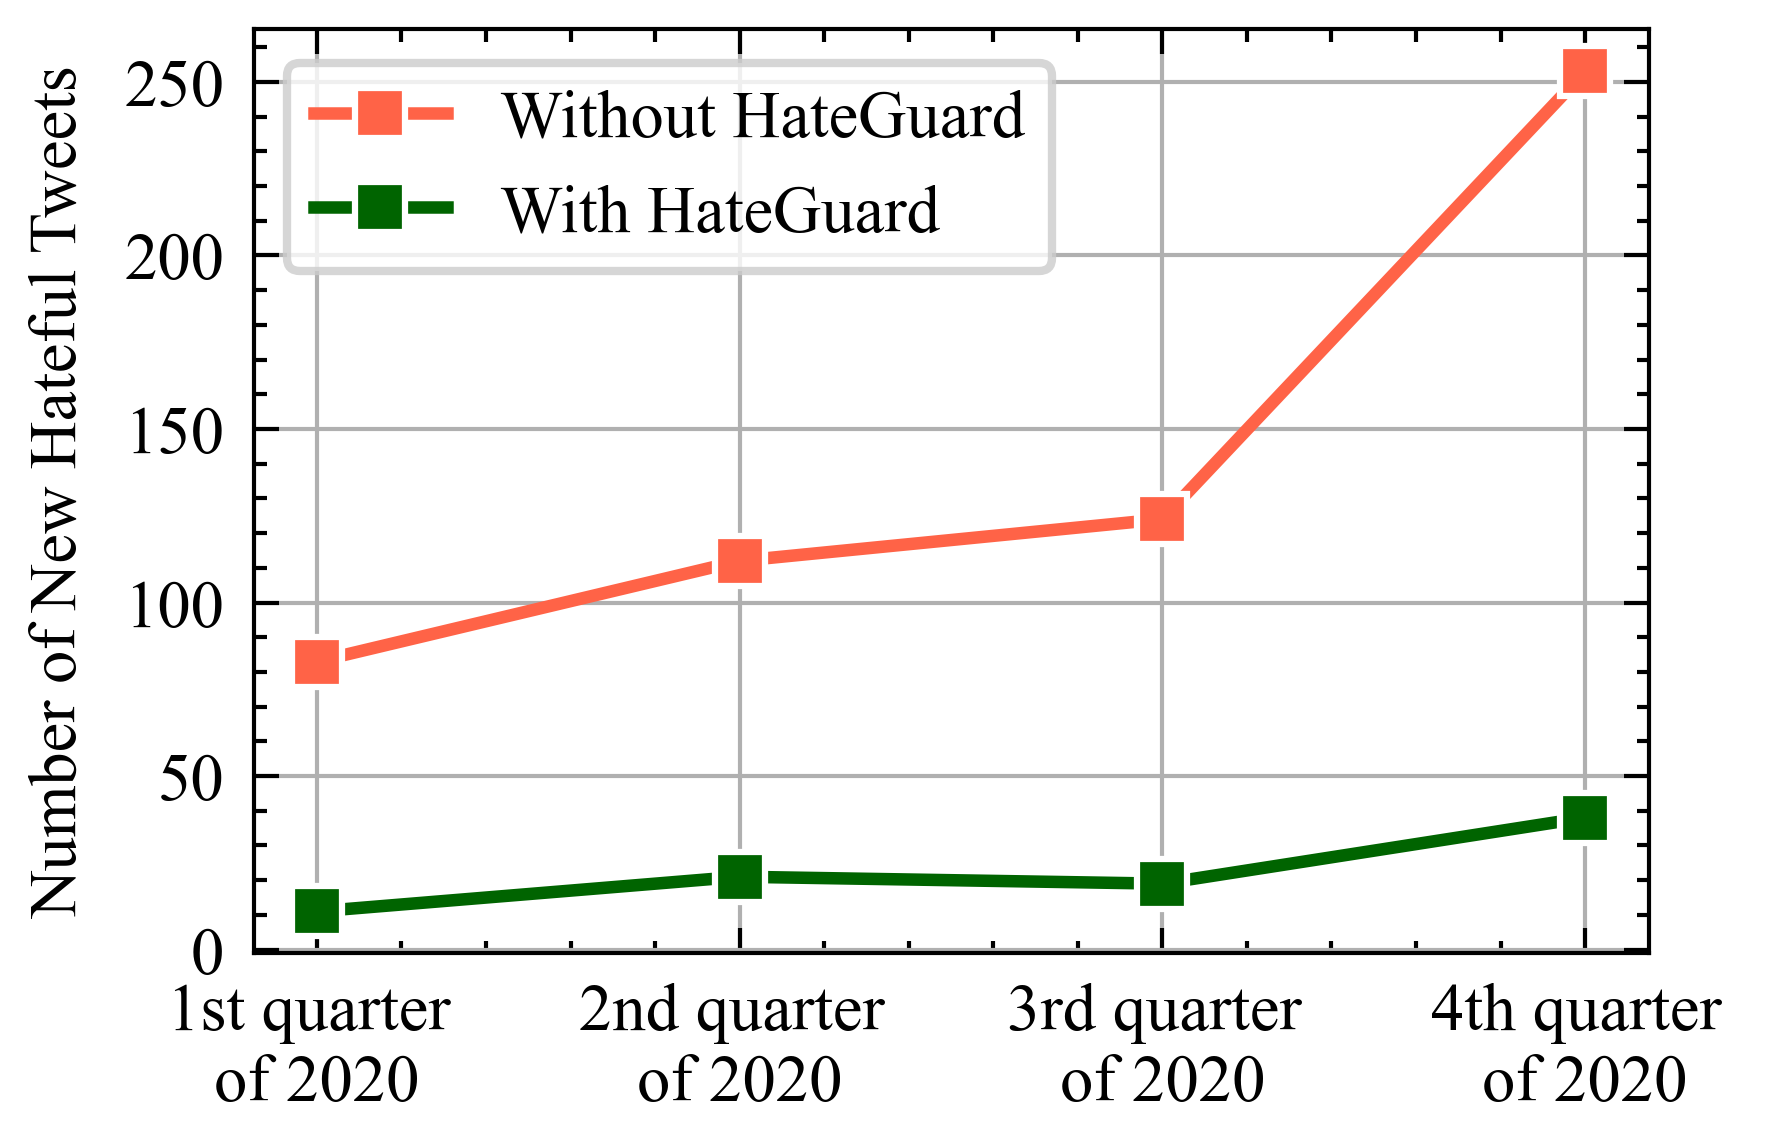

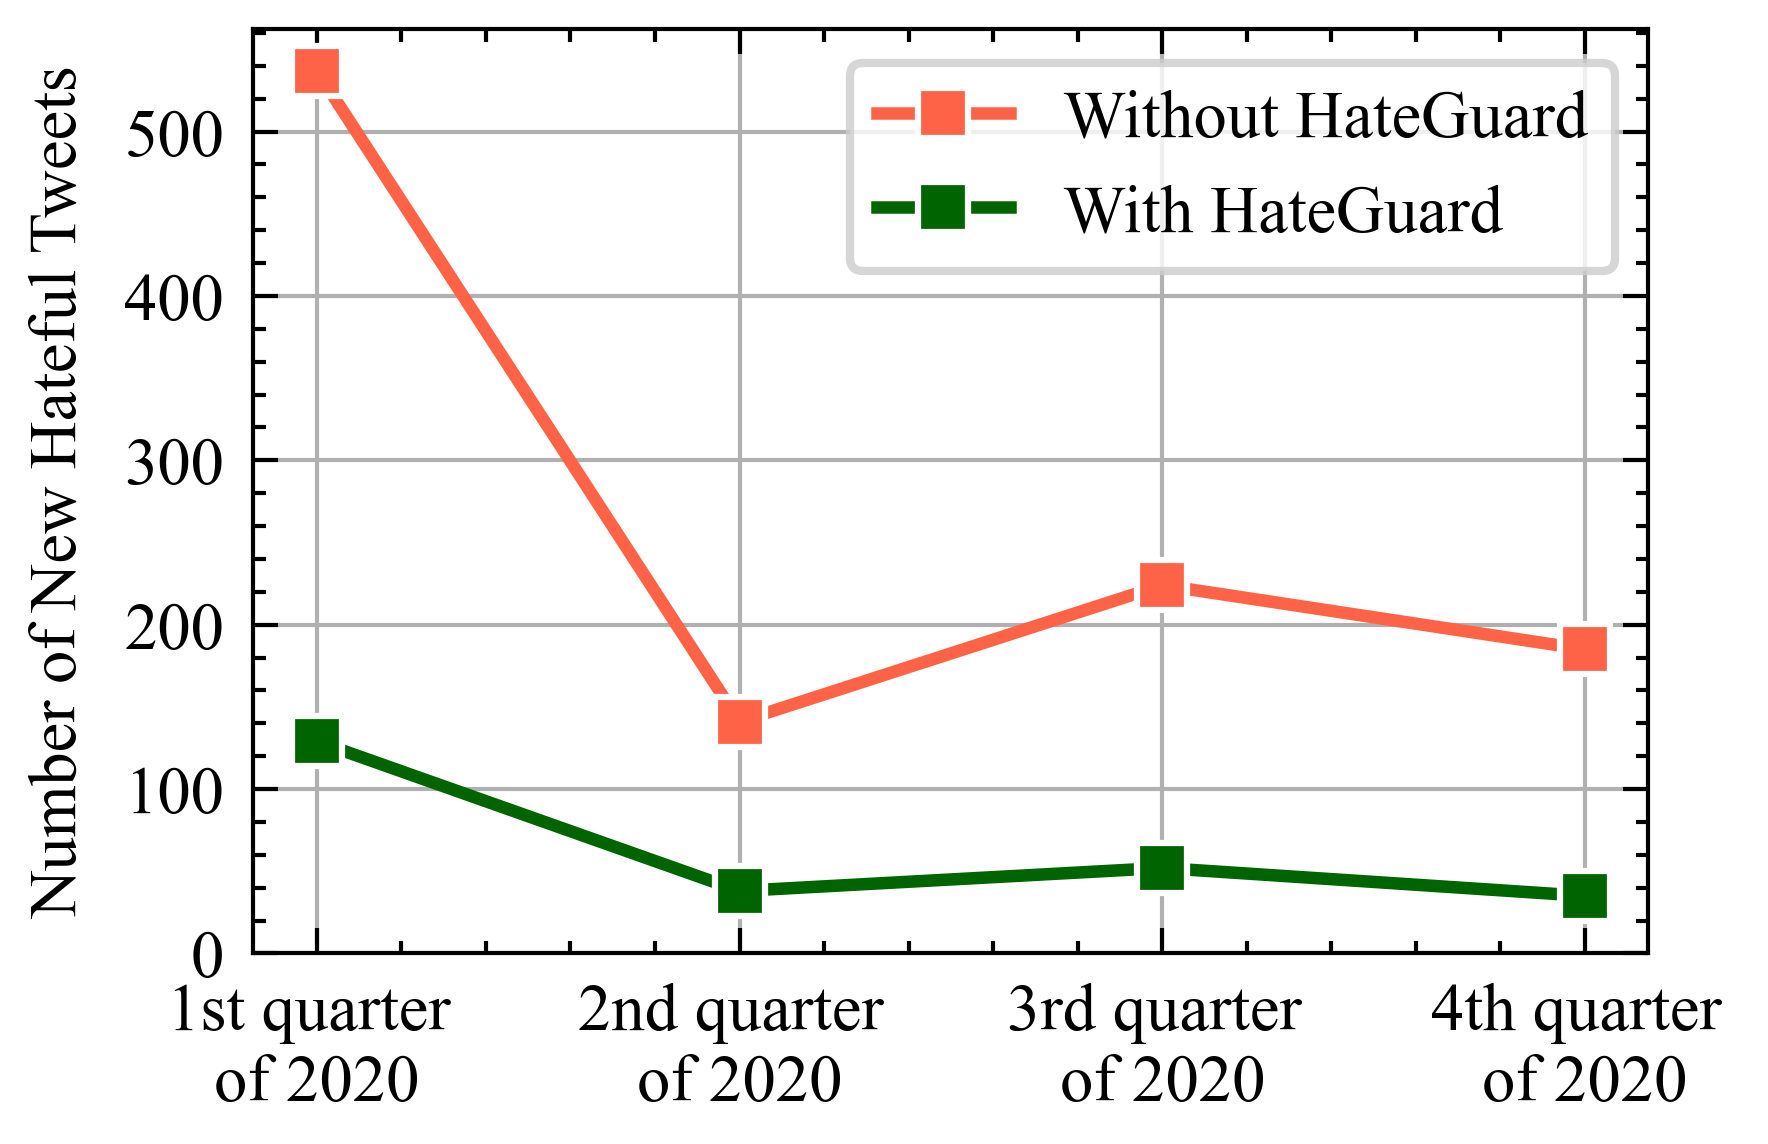

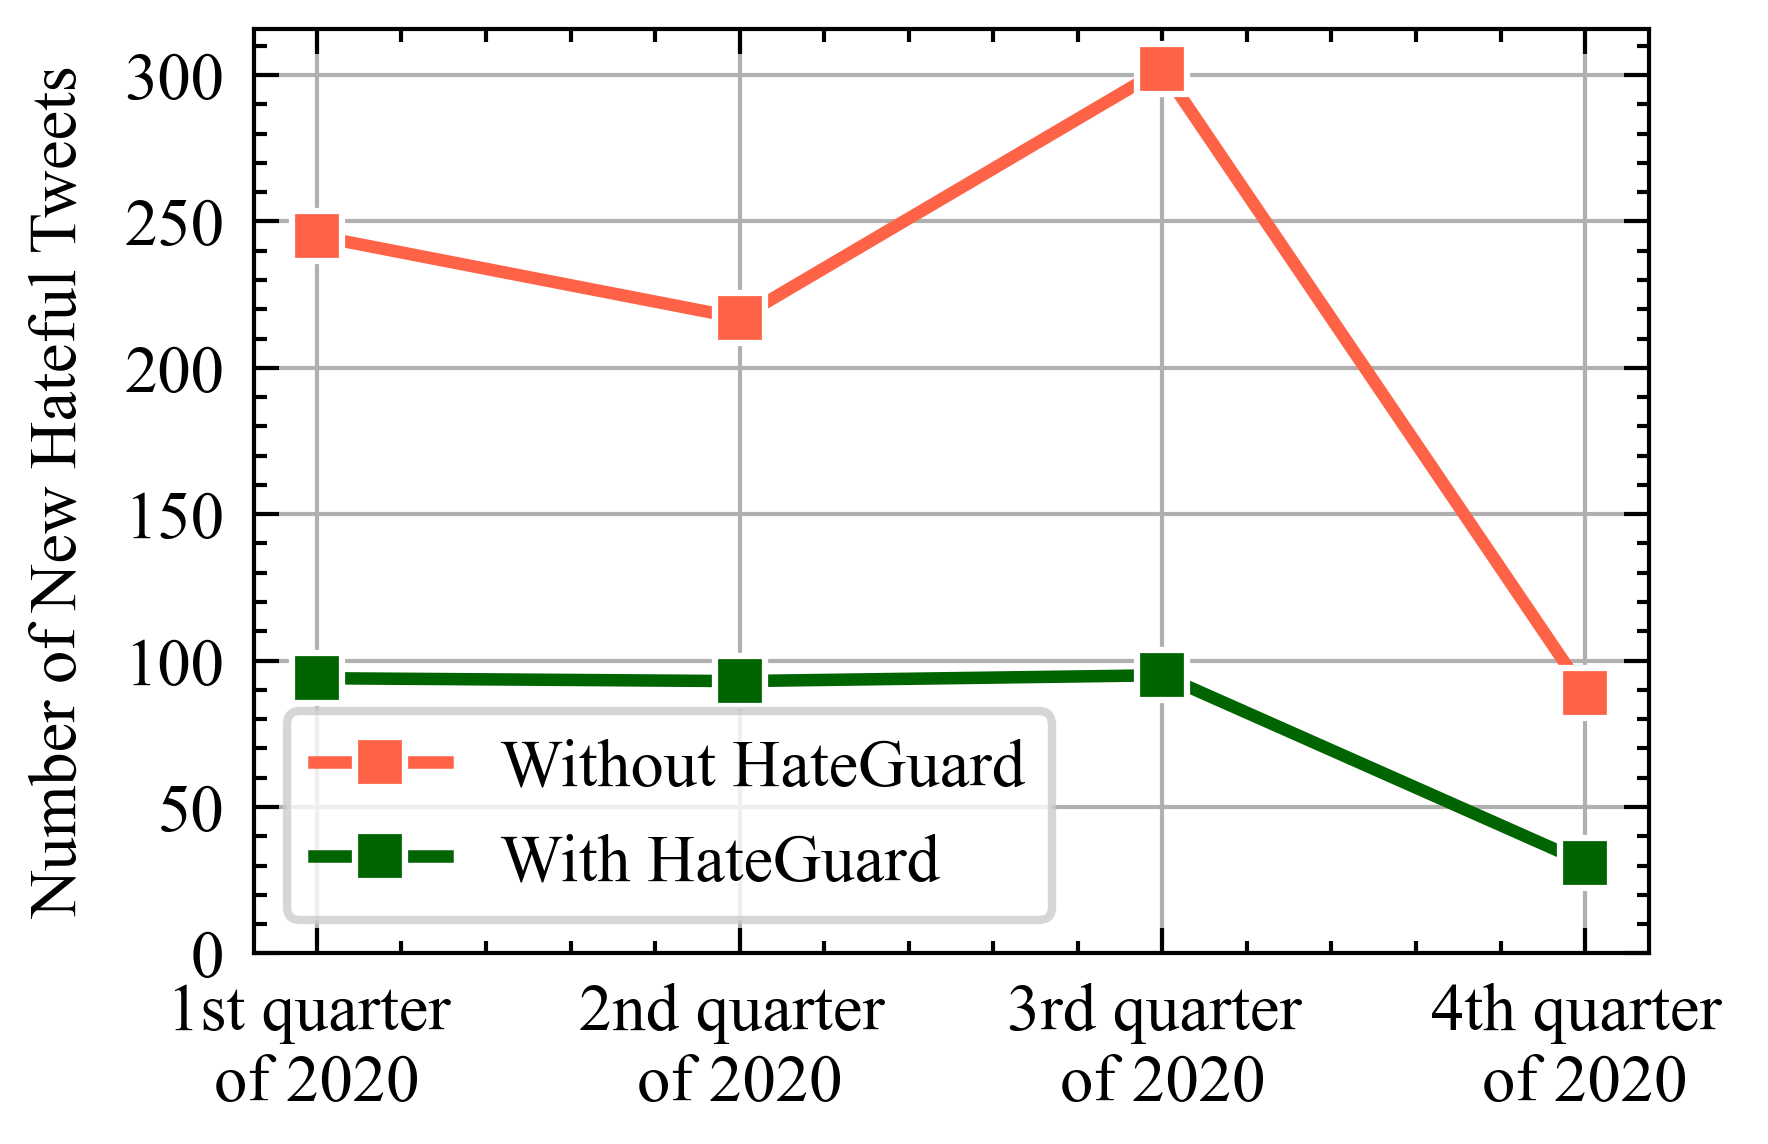

In [51]:
plot(df_age, 'age', np.arange(0, 250, 50))
plot(df_asian, 'asian', np.arange(0, 600, 100))
plot(df_mask, 'mask', np.arange(0, 300, 50))
plot(df_vac, 'vac', np.arange(0, 300, 50))
plot(df_us, 'us', np.arange(0, 600, 100))
plot(df_ru, 'ru', np.arange(0, 350, 50))

# Seperately plot

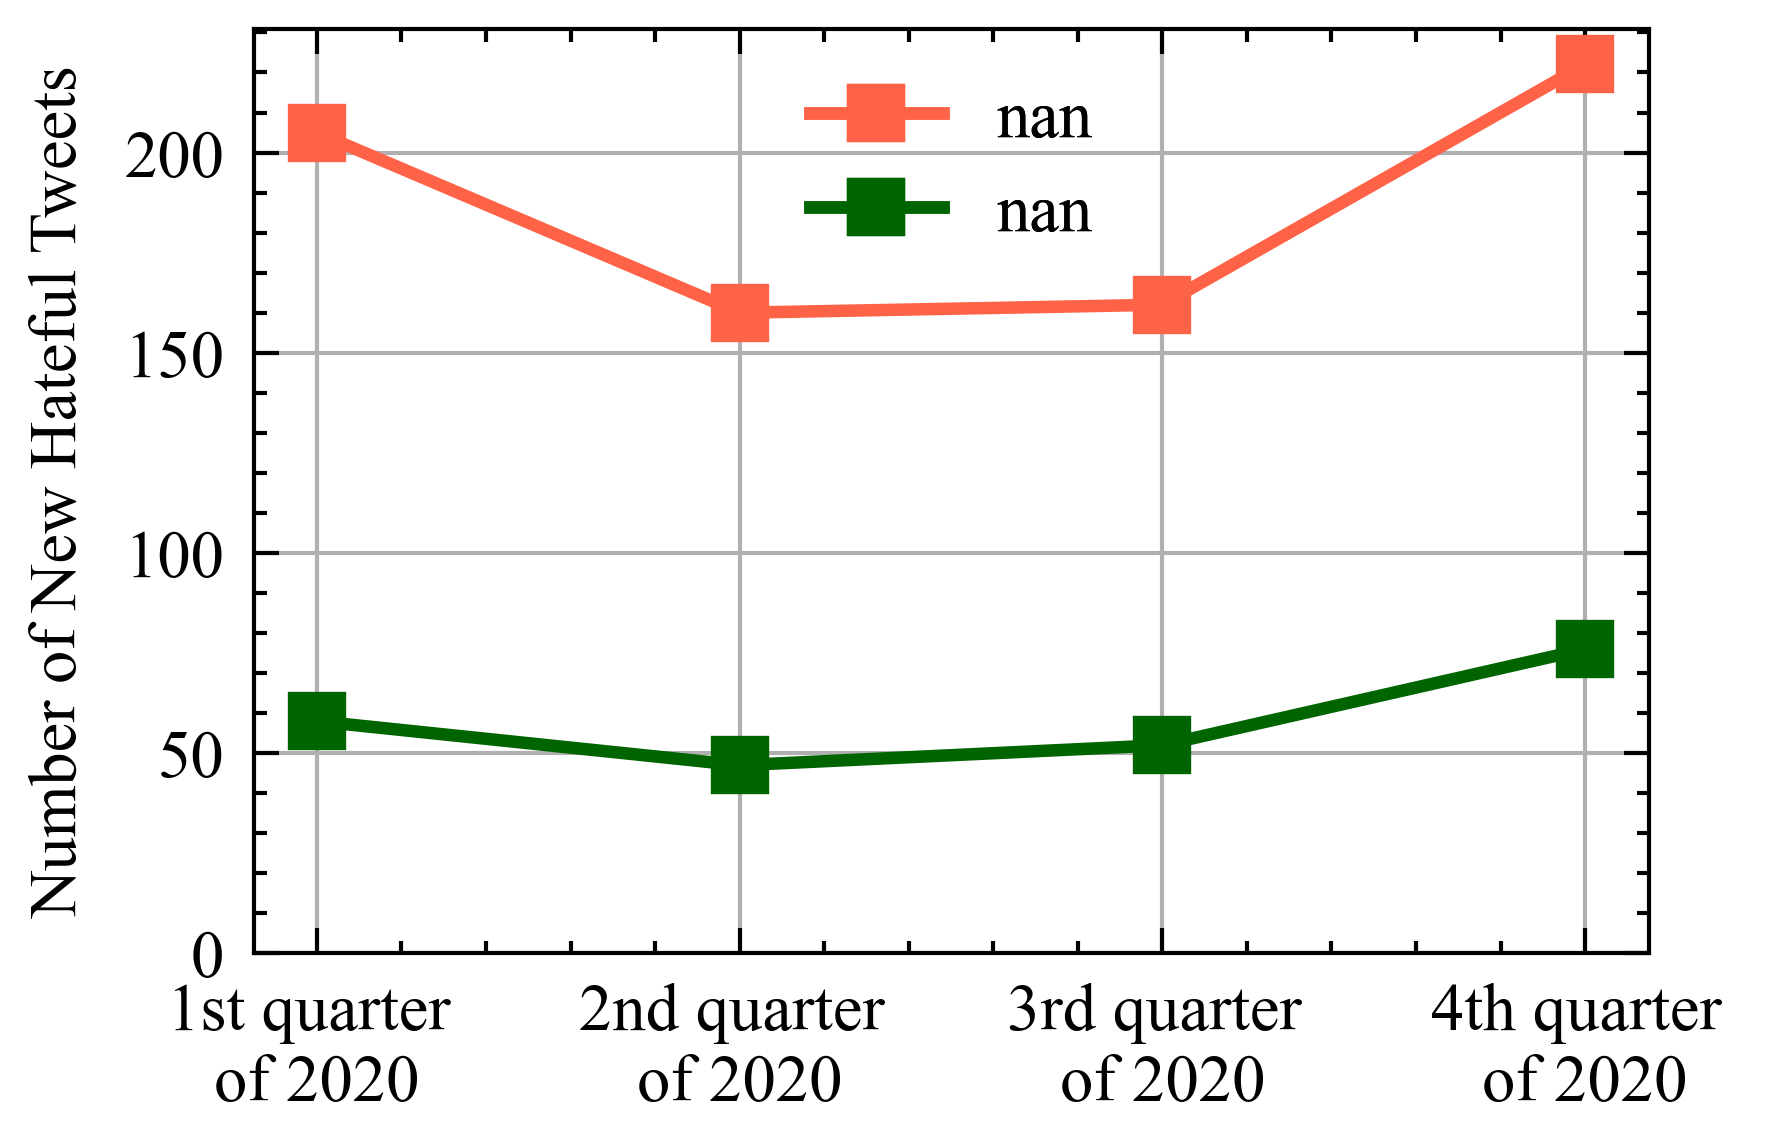

In [49]:
import numpy as np
# line plot for df_age
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_age.iloc[0, 0:4], label=df_age.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_age.iloc[1, 0:4], label=df_age.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2020', '2nd quarter \nof 2020', '3rd quarter \nof 2020', '4th quarter \nof 2020'))
# set the yticks
plt.yticks(np.arange(0, 250, 50))
# decrease the yticks distance
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)


# set the legend
plt.legend(loc='lower right', frameon=False)
# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper center', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/age.pdf', bbox_inches='tight')

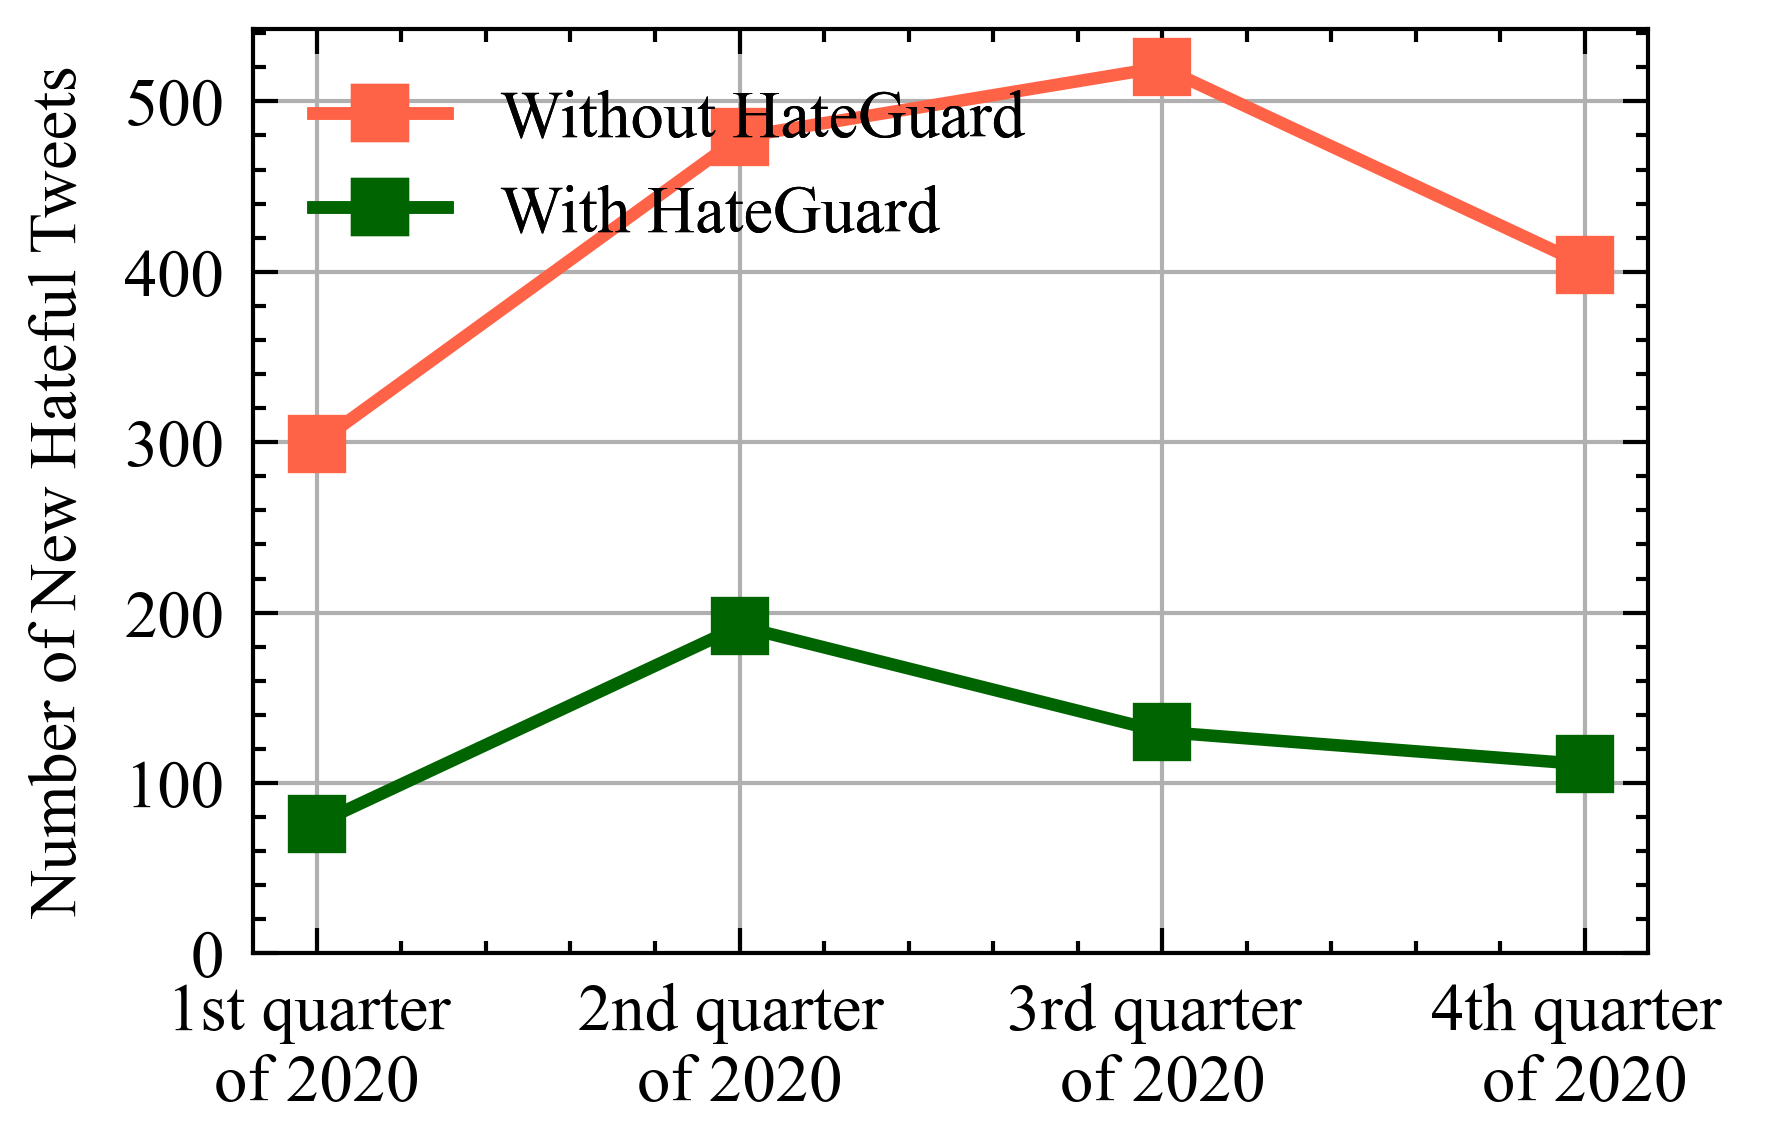

In [50]:
# df_asian
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_asian.iloc[0, 0:4], label=df_asian.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_asian.iloc[1, 0:4], label=df_asian.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2020', '2nd quarter \nof 2020', '3rd quarter \nof 2020', '4th quarter \nof 2020'))
# set the yticks
plt.yticks(np.arange(0, 600, 100))
# decrease the yticks distance
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)

# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper left', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/asian.pdf', bbox_inches='tight')

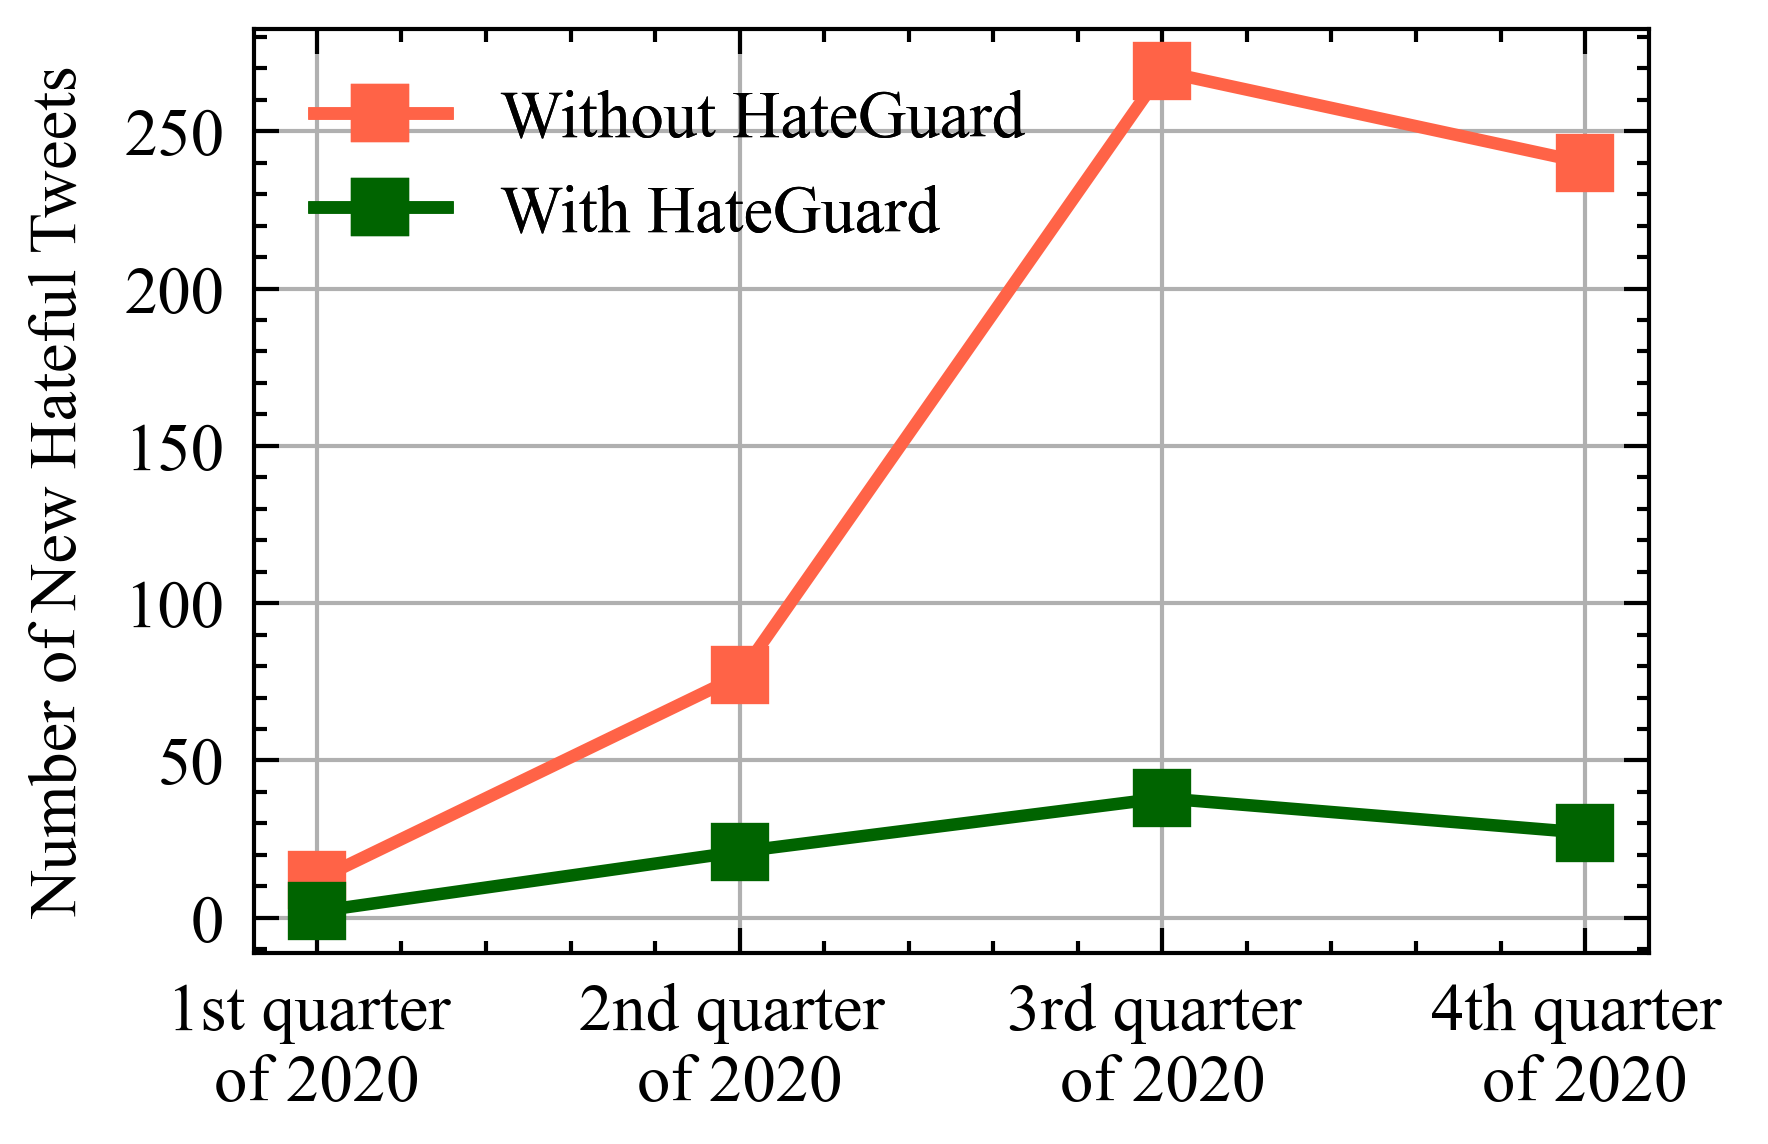

In [98]:
# df_mask
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_mask.iloc[0, 0:4], label=df_mask.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_mask.iloc[1, 0:4], label=df_mask.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2020', '2nd quarter \nof 2020', '3rd quarter \nof 2020', '4th quarter \nof 2020'))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)

# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper left', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/mask.pdf', bbox_inches='tight')

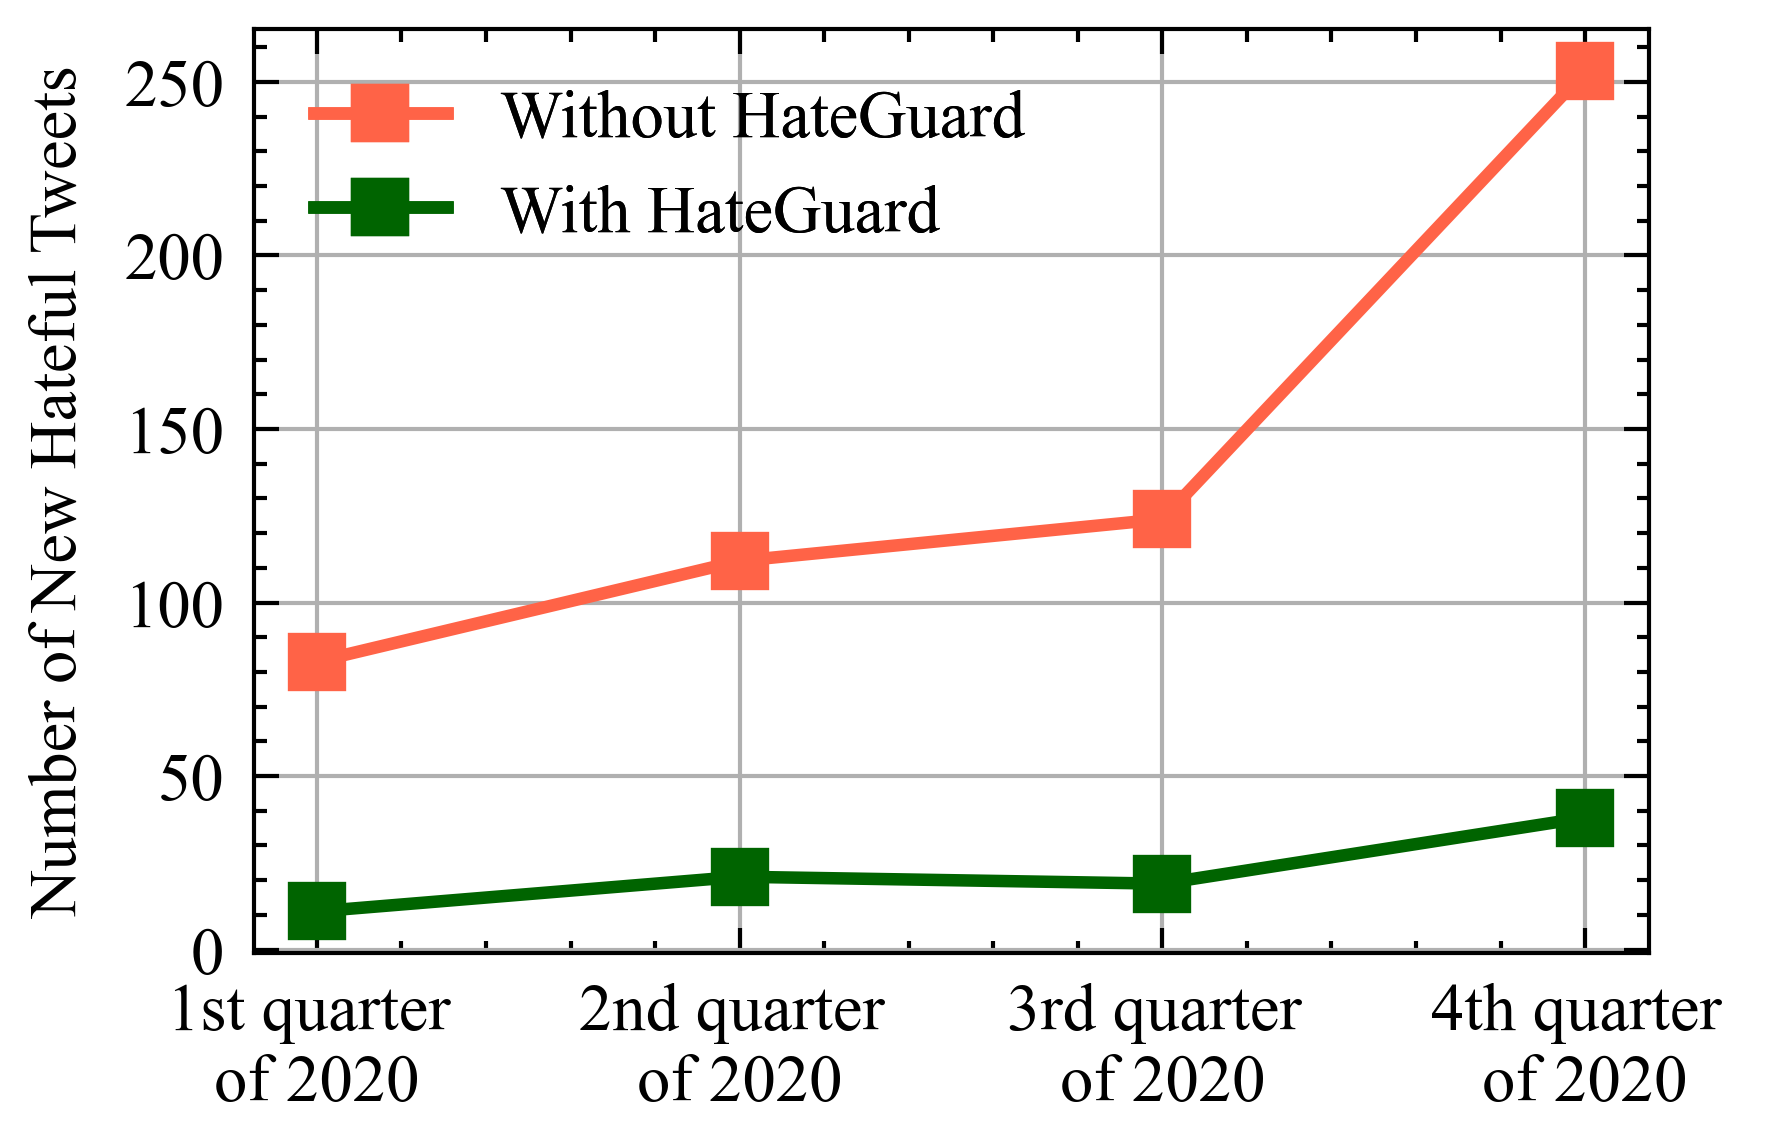

In [99]:
# df_vac
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_vac.iloc[0, 0:4], label=df_vac.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_vac.iloc[1, 0:4], label=df_vac.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2020', '2nd quarter \nof 2020', '3rd quarter \nof 2020', '4th quarter \nof 2020'))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)

# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper left', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/vac.pdf', bbox_inches='tight')

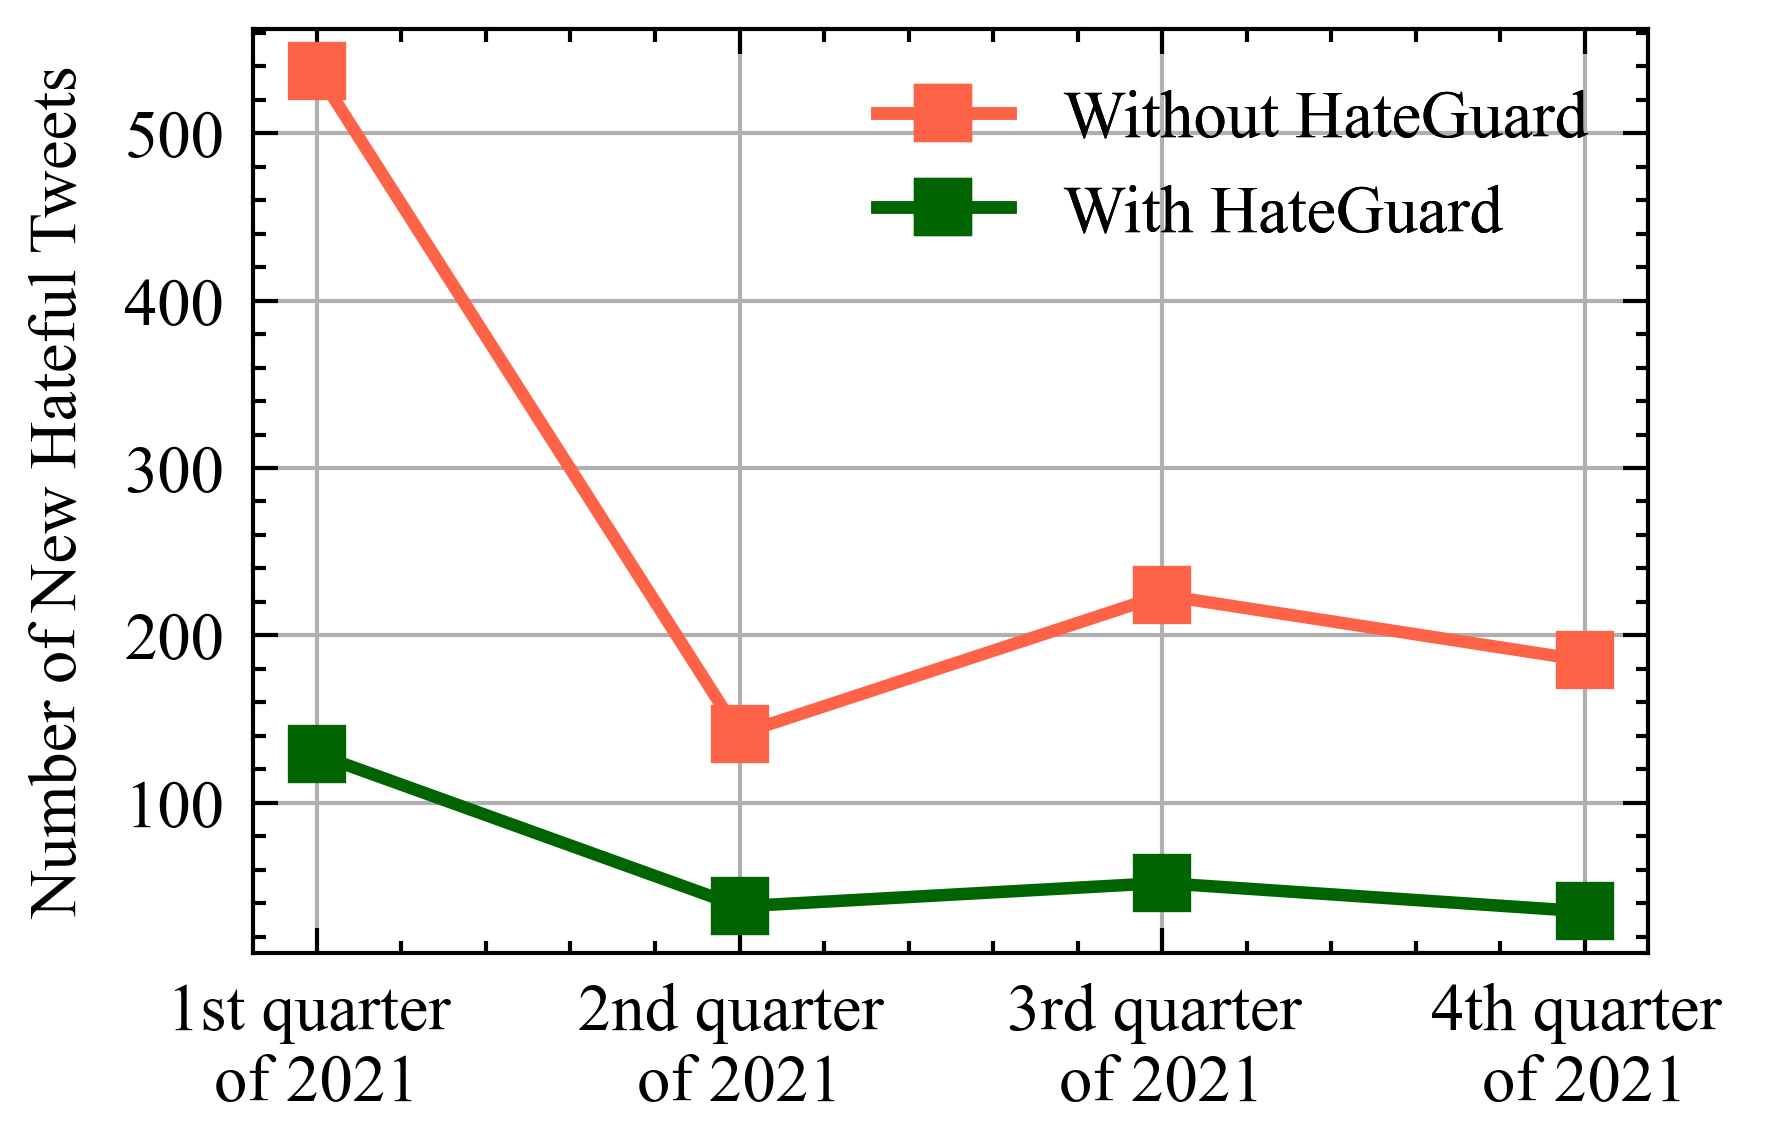

In [102]:
# df_us
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_us.iloc[0, 0:4], label=df_us.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_us.iloc[1, 0:4], label=df_us.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2021', '2nd quarter \nof 2021', '3rd quarter \nof 2021', '4th quarter \nof 2021'))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)

# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper right', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/us.pdf', bbox_inches='tight')


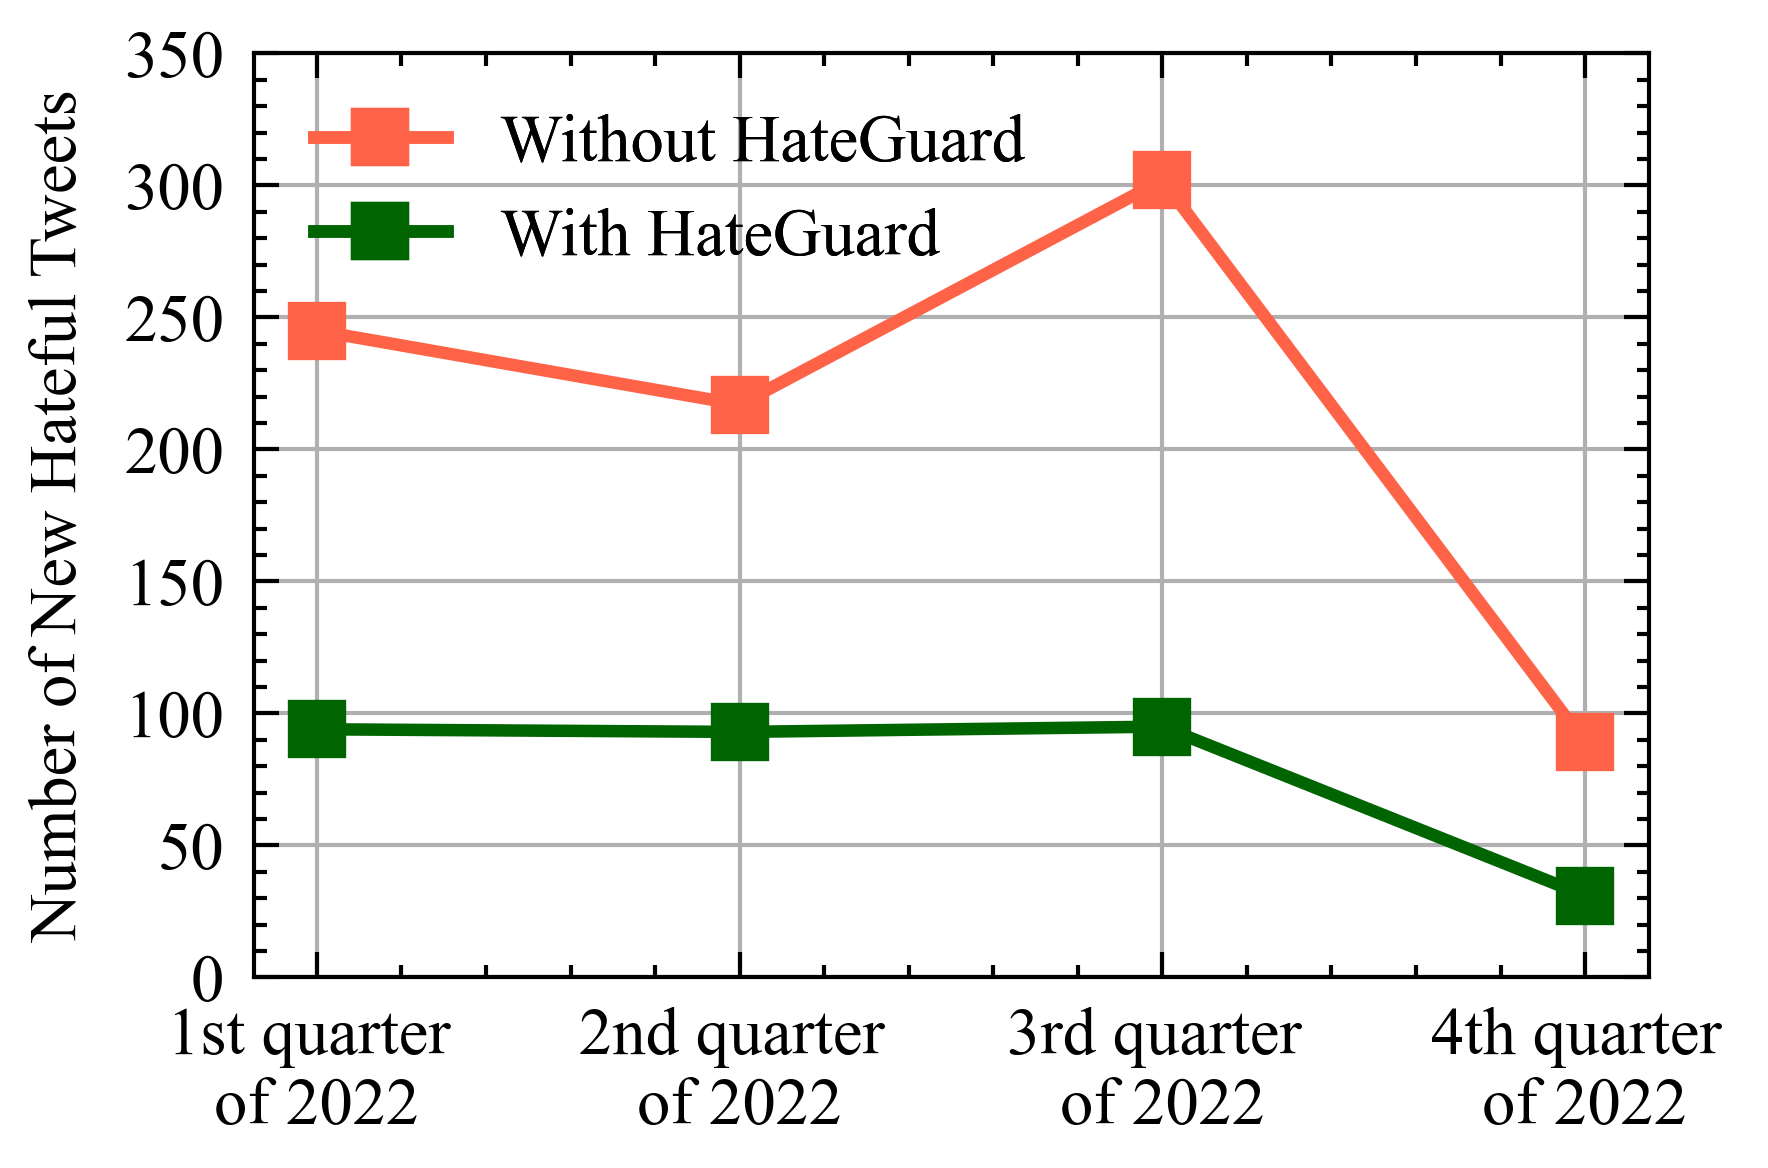

In [147]:
# df_ru
plt.figure(figsize=(3, 2))
# x axis values are the quarters
x = np.arange(4)
# plot the line for the first dataset
plt.plot(x, df_ru.iloc[0, 0:4], label=df_ru.iloc[0, 4], marker='s', color='tomato', linewidth=1.5)
# plot the line for the second dataset
plt.plot(x, df_ru.iloc[1, 0:4], label=df_ru.iloc[1, 4], marker='s', color='darkgreen', linestyle='-', linewidth=1.5)

# change the xticks
plt.xticks(x, ('1st quarter \nof 2022', '2nd quarter \nof 2022', '3rd quarter \nof 2022', '4th quarter \nof 2022'))

plt.yticks(np.arange(0, 360, 50))

# add grid
plt.grid(axis='y', linestyle='-' , linewidth=0.5, alpha=1)
plt.grid(axis='x', linestyle='-' , linewidth=0.5, alpha=1)

# add lengend box background
plt.gca().add_artist(plt.legend(loc
='upper left', frameon=False))

# y axis label
plt.ylabel('Number of New Hateful Tweets')

# save the figure
plt.savefig('new_wave_plots/ru.pdf', bbox_inches='tight')

In [131]:
# importing required modules
import PyPDF2
# read the plots
age_plot = PyPDF2.PdfReader('new_wave_plots/age.pdf')
asian_plot = PyPDF2.PdfReader('new_wave_plots/asian.pdf')
mask_plot = PyPDF2.PdfReader('new_wave_plots/mask.pdf')
vac_plot = PyPDF2.PdfReader('new_wave_plots/vac.pdf')
us_plot = PyPDF2.PdfReader('new_wave_plots/us.pdf')
ru_plot = PyPDF2.PdfReader('new_wave_plots/ru.pdf')